In [1]:
import torch.nn as nn
import torch

In [2]:
torch.cuda.empty_cache() 

In [3]:
torch.cuda.is_available()

True

%%bash
git commit -a -m "studying basic stats further  "

https://www.rileynwong.com/blog/2019/2/25/generating-music-with-an-lstm-neural-network

In [4]:
from IPython.core.debugger import Pdb

# basic library loading

In [5]:
from plotnine import *

import pandas as pd

import numpy as np

# data preparation

In [6]:
max_sequence_length = 100

In [7]:
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

In [8]:
import glob

import score2df

In [9]:
import score2df

In [10]:
from importlib import reload

In [ ]:
reload(score2df)

## 差分バージョン

In [11]:
is_difference_based = True

In [12]:
is_discrete = True

In [13]:
from music21 import converter, instrument, note, chord

In [14]:
id = str(is_difference_based) + "_"  + str(is_discrete)

In [15]:
pkl_path = 'saved/seq_df_scores_{}.pkl'.format(id)

In [16]:
is_use_preprocessed_df = True

In [17]:
df_scores = pd.DataFrame()
if is_use_preprocessed_df:
    df_scores = pd.read_pickle(pkl_path)
else:
    for file in glob.glob("chorales/midi/*.mid"):
        df_score = score2df.score2dataframe(file)
        df_score = score2df.add_sequential_diffs(df_score)
        df_score = df_score.assign(file = file)
        df_scores = df_scores.append(df_score , ignore_index = True )
        
    df_scores.to_pickle(pkl_path)

## tmp

In [40]:
tmp = list()
for file in glob.glob("chorales/midi/*.mid"):
    midi = converter.parse(file)
    
    parts = instrument.partitionByInstrument(midi)
    #parts = instrument.partitionByIntrument(midi)
    if not parts:
        tmp.append(file)

In [41]:
tmp

['chorales/midi/028100b_.mid',
 'chorales/midi/026100b_.mid',
 'chorales/midi/028700b_.mid',
 'chorales/midi/032200b_.mid',
 'chorales/midi/065900b_.mid',
 'chorales/midi/061500b_.mid',
 'chorales/midi/006906b_.mid',
 'chorales/midi/012008ba.mid',
 'chorales/midi/001707b_.mid',
 'chorales/midi/016206blpz.mid',
 'chorales/midi/014004b_.mid',
 'chorales/midi/069100b_.mid',
 'chorales/midi/009005b_.mid',
 'chorales/midi/070000b_.mid',
 'chorales/midi/065200b_.mid',
 'chorales/midi/009801b_.mid',
 'chorales/midi/069400b_.mid',
 'chorales/midi/037700b_.mid',
 'chorales/midi/033000b_.mid',
 'chorales/midi/034200b_.mid',
 'chorales/midi/005708b_.mid',
 'chorales/midi/041600b_.mid',
 'chorales/midi/037500b_.mid',
 'chorales/midi/039800b_.mid',
 'chorales/midi/038300b_.mid',
 'chorales/midi/027200b_.mid',
 'chorales/midi/040200b_.mid',
 'chorales/midi/012406b_.mid',
 'chorales/midi/010602b_.mid',
 'chorales/midi/008606b_.mid',
 'chorales/midi/004003b_.mid',
 'chorales/midi/007607b_.mid',
 'chor

## have a look at the data

In [18]:
df_scores.head()

,pitch,time,cent,n,dcent,dt,file
0,F2,3.0,-1900.0,0,NaN,NaN,chorales/midi/028100b_.mid
1,A3,3.0,-300.0,1,1600.0,0.0,chorales/midi/028100b_.mid
2,C4,3.0,0.0,2,300.0,0.0,chorales/midi/028100b_.mid
3,F4,3.0,500.0,3,500.0,0.0,chorales/midi/028100b_.mid
4,F3,4.0,-700.0,0,1200.0,1.0,chorales/midi/028100b_.mid


In [19]:
df_scores.describe()

,time,cent,n,dcent,dt
count,239796.000000,239796.000000,239796.000000,239298.000000,239298.00000
mean,103.393965,190.483578,1.326382,440.044213,0.18650
std,129.224620,972.031414,1.545788,1009.269247,0.31716
min,0.000000,-3600.000000,0.000000,-5300.000000,0.00000
25%,26.500000,-500.000000,0.000000,0.000000,0.00000
50%,53.000000,200.000000,1.000000,400.000000,0.00000
75%,125.000000,900.000000,2.000000,900.000000,0.25000
max,906.000000,3100.000000,14.000000,5500.000000,6.00000


/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 498 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


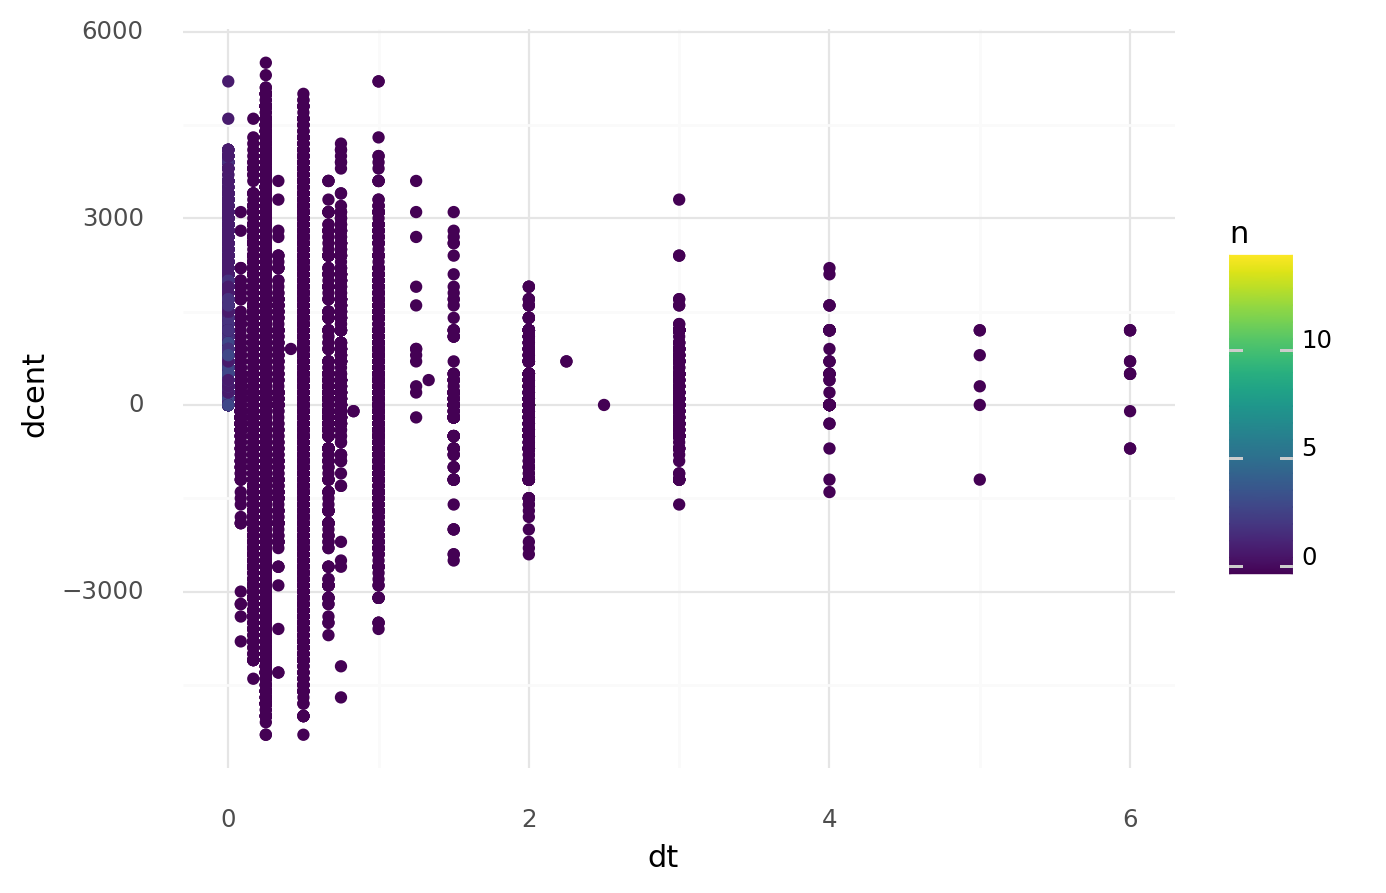

<ggplot: (-9223363277455597119)>

In [20]:
ggplot(df_scores , aes(x = 'dt' , y = 'dcent' , color = 'n')) + geom_point() + theme_minimal()

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 245'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 498 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


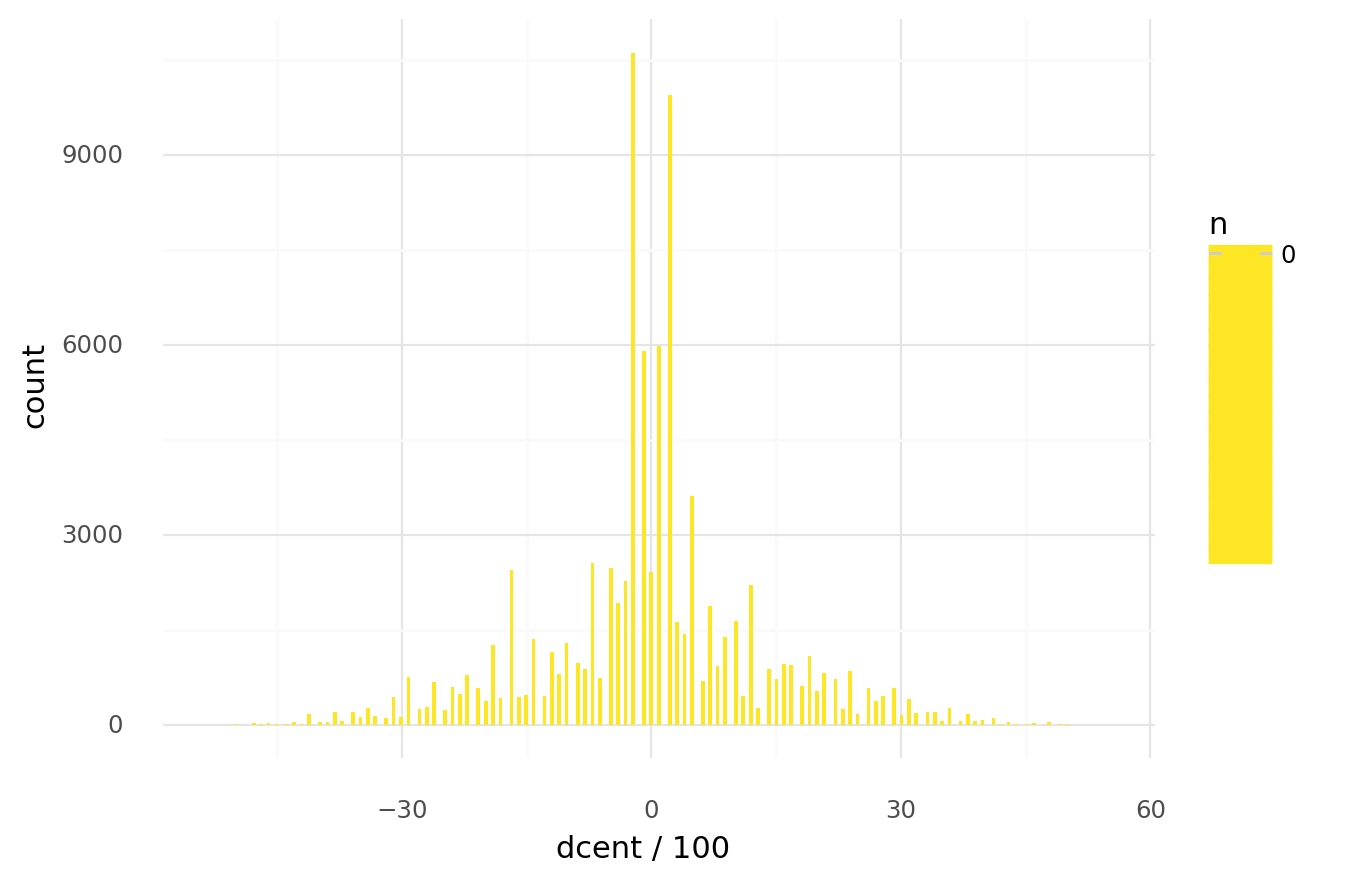

<ggplot: (-9223363277457520801)>

In [25]:
ggplot(df_scores.query('dt != 0') , aes(fill = 'n' , x = 'dcent / 100')) + geom_histogram() + theme_minimal()

In [18]:
len(set(df_scores.query('abs(dcent/100)>20 & n != 0')['file']))

310

In [35]:
from IPython.display import Image

Image(filename=converter.parse('chorales/midi/000101b_.mid').write('lily.png'))

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 229'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


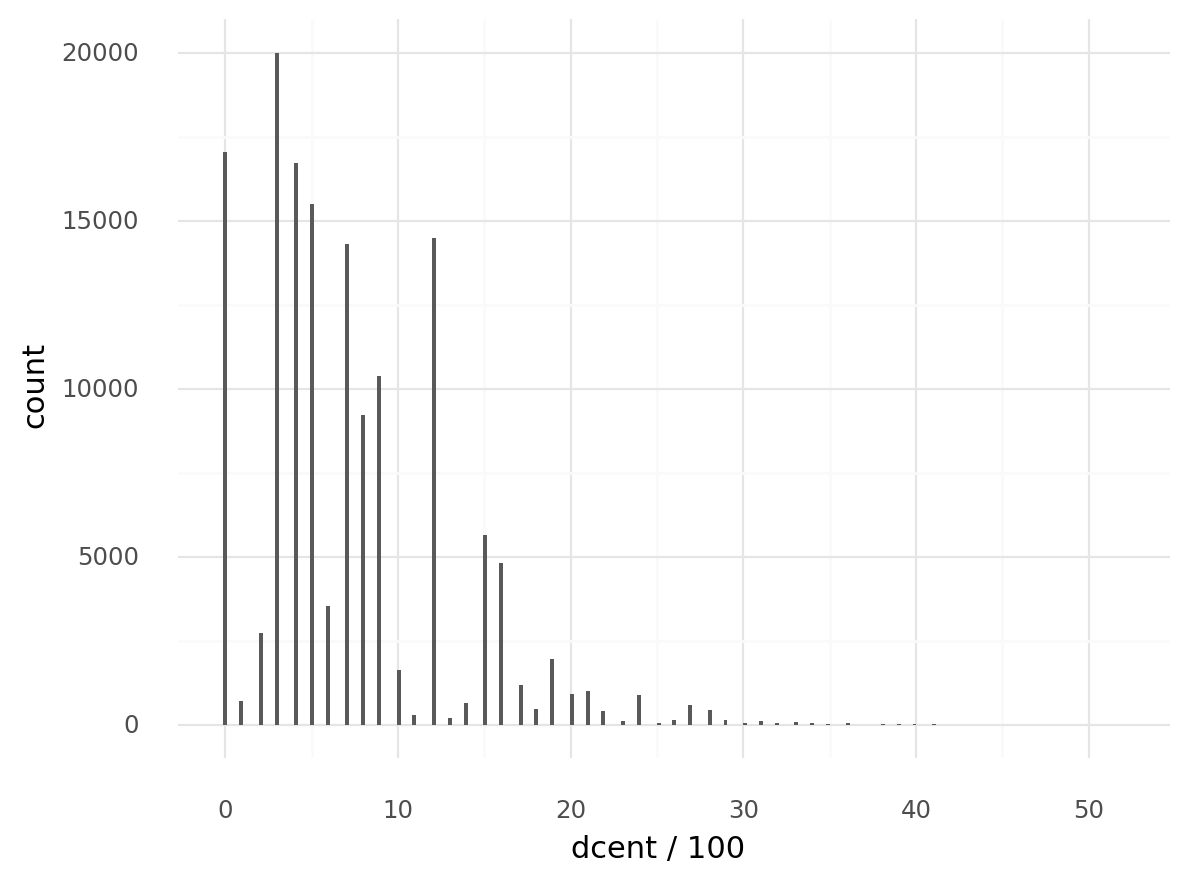

<ggplot: (8759397535822)>

In [24]:
ggplot(df_scores.query('dt == 0') , aes(fill = 'n' , x = 'dcent / 100')) + geom_histogram() + theme_minimal()

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 229'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


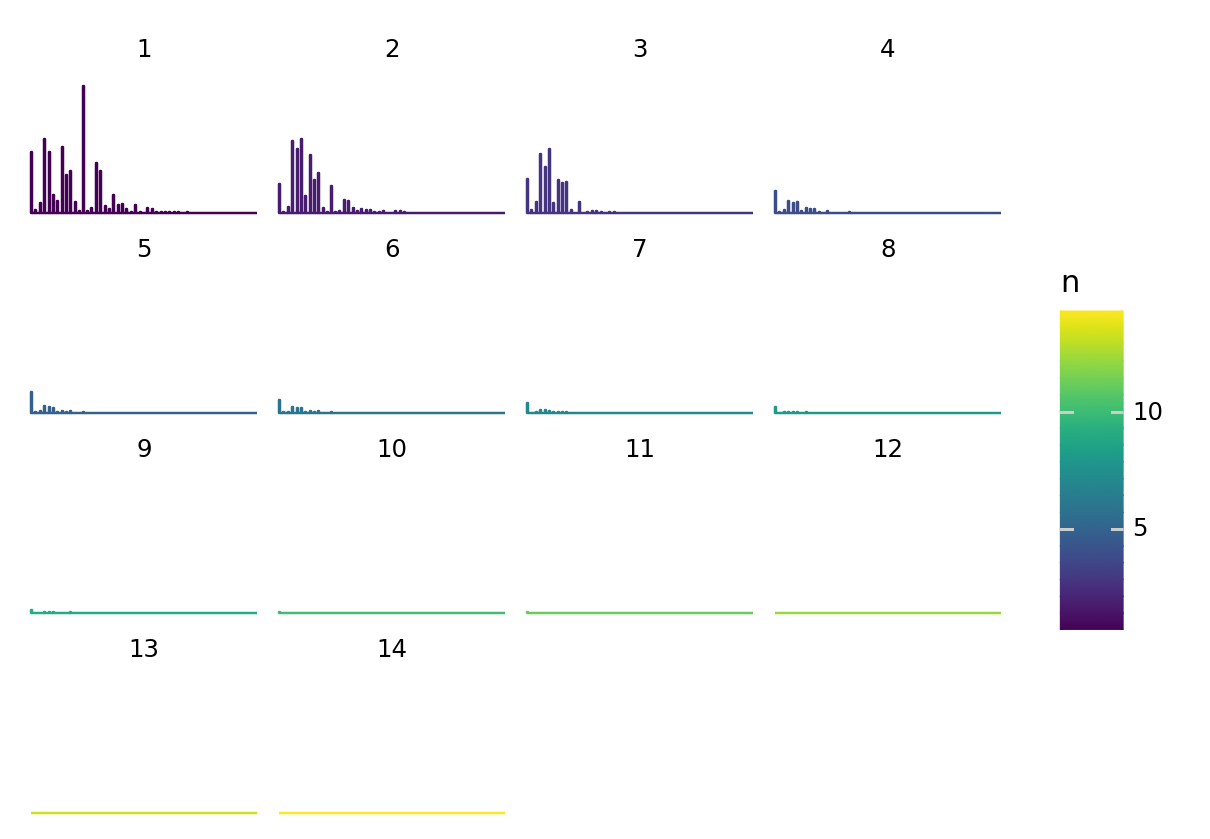

<ggplot: (-9223363277457662022)>

In [21]:
ggplot(df_scores.query('dt == 0') , aes(color = 'n' , x = 'dcent')) + geom_histogram() + facet_wrap('~n') + theme_void()

## preprocess 2

In [19]:
if is_discrete:
    dtype = str
else:
    dtype = np.float64

In [20]:
notes_list = []
dt_list = []
for f in set(df_scores.file):
    df_file = df_scores[df_scores.file == f]

    run_notes = df_file.dcent.astype(dtype)
    run_dts = df_file.dt.astype(dtype)
    for n in split_list(run_notes , max_sequence_length):
        if len(n) > 10:
            notes_list.append(n)
    for n in split_list(run_dts , max_sequence_length):
        if len(n) > 10:
            dt_list.append(n)
        

In [ ]:
len(notes_list)

In [ ]:
len(dt_list)

In [ ]:
len(notes_list[0])

In [ ]:
len(dt_list[0])

#### linear regresssion


https://www.statsmodels.org/dev/example_formulas.html

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols(formula = 'dcent ~ dcent_lag1' , data = df_stage)

In [ ]:
res = mod.fit()

print(res.summary())

https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

## pre-pack procedures

In [22]:
from music21 import converter, instrument, note, chord

### with label encoding (for discrete version)
https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
に概ね準拠仕様と思ったが・・・

- そもそもlabelencoder -> onehot  は今後必要ないよとwarning が出る
- onehot の挙動が読みにくい

のでlabelencodingしたあと直にnp.arrayをmanual onehote化したほうがいいのではないか？？

In [23]:
raw_y1, raw_X1 , le1 = score2df.yx_encoder(notes_list)

In [24]:
raw_y2, raw_X2 , le2 = score2df.yx_encoder(dt_list)

In [25]:
raw_X = [torch.cat((raw_X1[i] , raw_X2[i]) , 1) for i in range(len(raw_X1))]

## pad and pack

In [26]:
packed_X = torch.nn.utils.rnn.pack_sequence(raw_X , enforce_sorted=False)

ppd_X = torch.nn.utils.rnn.pad_packed_sequence(packed_X)

In [27]:
packed_y1 = torch.nn.utils.rnn.pack_sequence(raw_y1 , enforce_sorted=False)

ppd_y1 = torch.nn.utils.rnn.pad_packed_sequence(packed_y1)

In [28]:

packed_y2 = torch.nn.utils.rnn.pack_sequence(raw_y2 , enforce_sorted=False)

ppd_y2 = torch.nn.utils.rnn.pad_packed_sequence(packed_y2)

### reference

- [OneHotEncoderだけでいける。LabelEncoderをかます必要なし]と当初思っていたがむしろ逆



https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn

Another possible good reference:
https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn


## mask

In [29]:
mask = torch.Tensor([len(x) - 1 for x in notes_list])
                     

or

In [30]:
mask = ppd_X[1]

# LTSM

参考文献のpreprocessはあまり納得いかないので・・

https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

をみつつやってみるか

## 参考文献に似せたモデル
https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5
に似せたモデル


softmaxを二重にかけないように注意

In [34]:
class my_model(nn.Module):

    def __init__(self, input_size1 , input_size2, hidden_size, num_layers , dropout):
        #super(my_model, self).__init__()
        
        super().__init__()

        self.relu = nn.ReLU()
        
        input_size = input_size1 + input_size2
        


        self.rnn = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers , dropout=dropout)

        self.linear1 = nn.Linear(hidden_size, input_size1) #output dimension has to be identical with the input dimension
        
        self.linear2 = nn.Linear(hidden_size, input_size2) #output dimension has to be identical with the input dimension
 
        self.linear1b = nn.Linear(input_size1, input_size1) #output dimension has to be identical with the input dimension
        
        self.linear2b = nn.Linear(input_size2, input_size2) #output dimension has to be identical with the input dimension
  
     


    def forward(self, input):
        #self.h0 = torch.randn(self.num_layers , sequence_num , self.hidden_size)
        #self.c0 = torch.randn(self.num_layers , sequence_num, self.hidden_size)
        y, (hn, cn) = self.rnn(input)#, (self.h0, self.c0))
        y1 = self.linear1(y)
        y1 = self.relu(y1)
        y1 = self.linear1b(y1)
        y2 = self.linear2(y)
        y2 = self.relu(y2)
        y2 = self.linear2b(y2)
       
        return y1,y2
    

In [35]:
input_size1 = raw_X1[0].shape[1]
input_size2 = raw_X2[0].shape[1]
hidden_size = 512 
num_layers = 2
dropout = 0.1

In [36]:
model = my_model(input_size1 , input_size2 , hidden_size , num_layers , dropout)

## dimensionality check

In [37]:
y_tmp1 ,y_tmp2 = model.forward(ppd_X[0][:, 0:10])

In [38]:
y_tmp1.shape

torch.Size([99, 10, 108])

In [39]:
y_tmp2.shape

torch.Size([99, 10, 61])

##    連続バージョン

https://stackoverflow.com/questions/49040180/change-tanh-activation-in-lstm-to-relu

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, nlayers, dropout):
        """"Constructor of the class"""
        super(LSTMCell, self).__init__()

        self.nlayers = nlayers
        self.dropout = nn.Dropout(p=dropout)

        ih, hh = [], []
        for i in range(nlayers):
            ih.append(nn.Linear(input_size, 4 * hidden_size))
            hh.append(nn.Linear(hidden_size, 4 * hidden_size))
        self.w_ih = nn.ModuleList(ih)
        self.w_hh = nn.ModuleList(hh)

    def forward(self, input, hidden):
        """"Defines the forward computation of the LSTMCell"""
        hy, cy = [], []
        for i in range(self.nlayers):
            hx, cx = hidden[0][i], hidden[1][i]
            gates = self.w_ih[i](input) + self.w_hh[i](hx)
            i_gate, f_gate, c_gate, o_gate = gates.chunk(4, 1)

            i_gate = F.sigmoid(i_gate)
            f_gate = F.sigmoid(f_gate)
            c_gate = F.tanh(c_gate)
            o_gate = F.sigmoid(o_gate)

            ncx = (f_gate * cx) + (i_gate * c_gate)
            nhx = o_gate * F.tanh(ncx)
            cy.append(ncx)
            hy.append(nhx)
            input = self.dropout(nhx)

        hy, cy = torch.stack(hy, 0), torch.stack(cy, 0)
        return hy, cy

# criterion (cross entropy lossはlog softmaxを含んでいるので二重に作用させないよう注意が必要）

cross entropy for one-hot representation
https://discuss.pytorch.org/t/cross-entropy-with-one-hot-targets/13580/4

one-hotのままでなくて、Rでいうところのfactorに戻したほうがよさそう（？）


In [40]:
criterion = nn.CrossEntropyLoss(reduction='sum')


input has to be a Tensor of size either (minibatch, C)(minibatch,C) or (minibatch, C, d_1, d_2, ..., d_K)

# GPU tool

In [41]:
is_use_gpu = True


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() and is_use_gpu else "cpu")

# optimizer

In [43]:
import torch.optim as optim# optimizer

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [44]:
optimizer = optim.Adam(model.parameters())

# optimization

In [45]:
from IPython.display import display

In [46]:
sample_size = ppd_X[0].shape[1]

In [47]:
print("sample size : {}".format(sample_size))

sample size : 2591


In [48]:
batch_size = 20

In [49]:
batch_indices = range( 0 ,sample_size ,  batch_size)

## n epochs

In [50]:
losses1 = []
losses2 = []

In [51]:
prob_when_random1 = 1 /input_size1

In [52]:
prob_when_random2 = 1 / input_size2

In [53]:
reload(score2df)

<module 'score2df' from '/home/toshinao/PycharmProjects/deepjazz_in_a_file/score2df.py'>

In [54]:
#model_path = 'saved/model20191124_{}'.format(id)

#model_path = 'saved/model20191125_{}'.format(id)

model_path = 'saved/model20191207_{}'.format(id)

In [55]:
n_epochs = 1000

In [56]:
model.to(device)
model.train()
for k in range(n_epochs):
    batch_loss1 = 0
    batch_loss2 = 0

    shuffled_idx = torch.randperm(sample_size)
    for i in batch_indices:
        #display(".")
        batch_samples = shuffled_idx[i:min(i + batch_size , sample_size) ]

        loss1, loss2 = score2df.batch_loss_2vars(ppd_y1, ppd_y2 , ppd_X , mask , batch_samples , device , model , criterion)
        batch_loss1 += loss1.item()
        batch_loss2 += loss2.item()
        loss = loss1 + loss2

        
        loss.backward()

        optimizer.step()
    batch_loss1 /= torch.sum(mask).item()
    losses1.append(batch_loss1)
    mean_correct_prob1 = np.exp(-batch_loss1)
    batch_loss2 /= torch.sum(mask).item()
    losses2.append(batch_loss2)
    mean_correct_prob2 = np.exp(-batch_loss2)    
    if k % 10 == 0:
        torch.save(model.state_dict() , model_path)
        display("epoch : {}".format(k))
        display("  [dcent] loss : {}   correct prob : {} correct / random : {}".format(batch_loss1 ,
                                                                        mean_correct_prob1 ,
                                                                        mean_correct_prob1 / prob_when_random1))
        
        display("  [dt] loss : {}   correct prob : {} correct / random : {}".format(batch_loss2 ,
                                                                        mean_correct_prob2 ,
                                                                        mean_correct_prob2 / prob_when_random2))

model.cpu()
torch.cuda.empty_cache() 

'epoch : 0'

'  [dcent] loss : 3.5127013453455898   correct prob : 0.029816261530986137 correct / random : 3.220156245346503'

'  [dt] loss : 1.3335371225619306   correct prob : 0.26354342533151903 correct / random : 16.07614894522266'

'epoch : 10'

'  [dcent] loss : 2.9641711474887007   correct prob : 0.05160322298535662 correct / random : 5.573148082418515'

'  [dt] loss : 0.6301083947048443   correct prob : 0.5325340740045318 correct / random : 32.484578514276436'

'epoch : 20'

'  [dcent] loss : 2.3023446762592443   correct prob : 0.10002404456372208 correct / random : 10.802596812881985'

'  [dt] loss : 0.44056790963841874   correct prob : 0.643670770430208 correct / random : 39.263916996242685'

'epoch : 30'

'  [dcent] loss : 1.771830423722341   correct prob : 0.170021492454111 correct / random : 18.36232118504399'

'  [dt] loss : 0.30229960189052024   correct prob : 0.7391165909862141 correct / random : 45.08611205015906'

'epoch : 40'

'  [dcent] loss : 1.224245370472204   correct prob : 0.2939794622217288 correct / random : 31.749781919946717'

'  [dt] loss : 0.19763264614381912   correct prob : 0.820671274527641 correct / random : 50.060947746186095'

'epoch : 50'

'  [dcent] loss : 0.7943901802430412   correct prob : 0.4518567020656363 correct / random : 48.80052382308872'

'  [dt] loss : 0.134110160680751   correct prob : 0.8744937244729839 correct / random : 53.34411719285202'

'epoch : 60'

'  [dcent] loss : 0.5100463669321706   correct prob : 0.6004677363199848 correct / random : 64.85051552255837'

'  [dt] loss : 0.09676475813295601   correct prob : 0.9077695264160728 correct / random : 55.37394111138044'

'epoch : 70'

'  [dcent] loss : 0.34926923532830917   correct prob : 0.7052032390827943 correct / random : 76.16194982094179'

'  [dt] loss : 0.0747317748762708   correct prob : 0.9279923638160676 correct / random : 56.60753419278012'

'epoch : 80'

'  [dcent] loss : 0.2577422165502023   correct prob : 0.7727944200437316 correct / random : 83.46179736472301'

'  [dt] loss : 0.05869791638884729   correct prob : 0.9429915884396376 correct / random : 57.52248689481789'

'epoch : 90'

'  [dcent] loss : 0.20304587145973577   correct prob : 0.8162407984099147 correct / random : 88.15400622827079'

'  [dt] loss : 0.048941583625733975   correct prob : 0.952236754292424 correct / random : 58.08644201183786'

'epoch : 100'

'  [dcent] loss : 0.17048859844329417   correct prob : 0.8432527039673258 correct / random : 91.07129202847119'

'  [dt] loss : 0.04333171373568919   correct prob : 0.9575936903969576 correct / random : 58.41321511421441'

'epoch : 110'

'  [dcent] loss : 0.15554601366804546   correct prob : 0.8559476907298789 correct / random : 92.44235059882692'

'  [dt] loss : 0.03937037339342972   correct prob : 0.961394568229218 correct / random : 58.64506866198229'

'epoch : 120'

'  [dcent] loss : 0.13931828676598304   correct prob : 0.8699510904685923 correct / random : 93.95471777060797'

'  [dt] loss : 0.036135374457852365   correct prob : 0.964509714665088 correct / random : 58.83509259457036'

'epoch : 130'

'  [dcent] loss : 0.13285265741664556   correct prob : 0.875594094900648 correct / random : 94.56416224926998'

'  [dt] loss : 0.03436790405087423   correct prob : 0.9662159644718348 correct / random : 58.93917383278192'

'epoch : 140'

'  [dcent] loss : 0.12158155088441228   correct prob : 0.8855188355599914 correct / random : 95.63603424047908'

'  [dt] loss : 0.03306725902322842   correct prob : 0.9674734860789931 correct / random : 59.015882650818575'

'epoch : 150'

'  [dcent] loss : 0.11664381703641545   correct prob : 0.889902104689766 correct / random : 96.10942730649474'

'  [dt] loss : 0.03028278828506572   correct prob : 0.9701711417195522 correct / random : 59.18043964489268'

KeyboardInterrupt: 

### load model

https://qiita.com/jyori112/items/aad5703c1537c0139edb

In [ ]:
model = my_model(input_size1 , input_size2 , hidden_size , num_layers , dropout)

In [ ]:
model.load_state_dict(torch.load(model_path, map_location='cpu'))

## check error

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

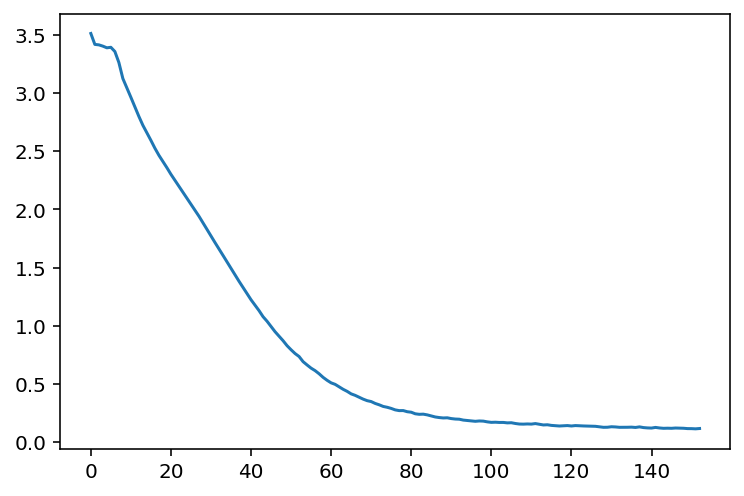

In [58]:
plt.plot(losses1)

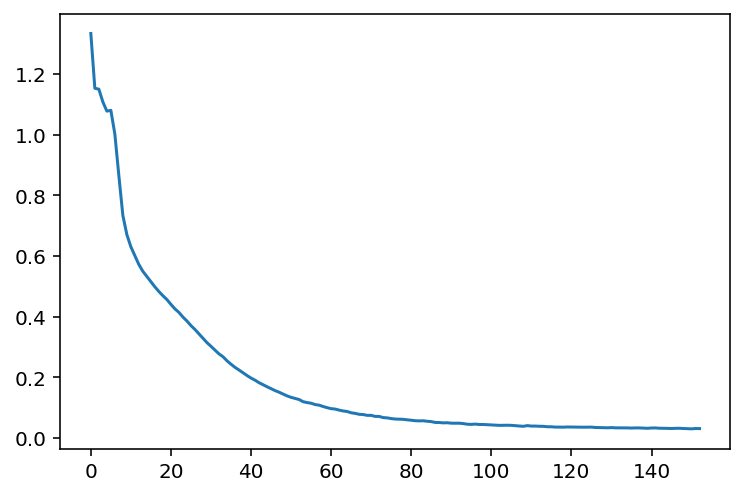

In [59]:
plt.plot(losses2)

## check errors using plotnine

In [ ]:
ggplot(pd.DataFrame({'n':range(len(losses)) , 'loss':losses}) , aes(x = 'n' , y ='loss')) + geom_point()

## predicted vs realized

In [60]:
model.eval()

my_model(
  (relu): ReLU()
  (rnn): LSTM(169, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=108, bias=True)
  (linear2): Linear(in_features=512, out_features=61, bias=True)
  (linear1b): Linear(in_features=108, out_features=108, bias=True)
  (linear2b): Linear(in_features=61, out_features=61, bias=True)
)

In [61]:
model.to(device)

my_model(
  (relu): ReLU()
  (rnn): LSTM(169, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=108, bias=True)
  (linear2): Linear(in_features=512, out_features=61, bias=True)
  (linear1b): Linear(in_features=108, out_features=108, bias=True)
  (linear2b): Linear(in_features=61, out_features=61, bias=True)
)

In [62]:
y_pred1, y_pred2 = model(ppd_X[0].to(device))

In [63]:
reload(score2df)

<module 'score2df' from '/home/toshinao/PycharmProjects/deepjazz_in_a_file/score2df.py'>

In [64]:
df_scatter = score2df.predicted_vs_realized(y_pred1 , ppd_y1 , le1)

In [65]:
df_scatter.head()

,pred,realized
0,300.0,3100.0
1,0.0,0.0
2,500.0,500.0
3,-2400.0,-2400.0
4,0.0,0.0


/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


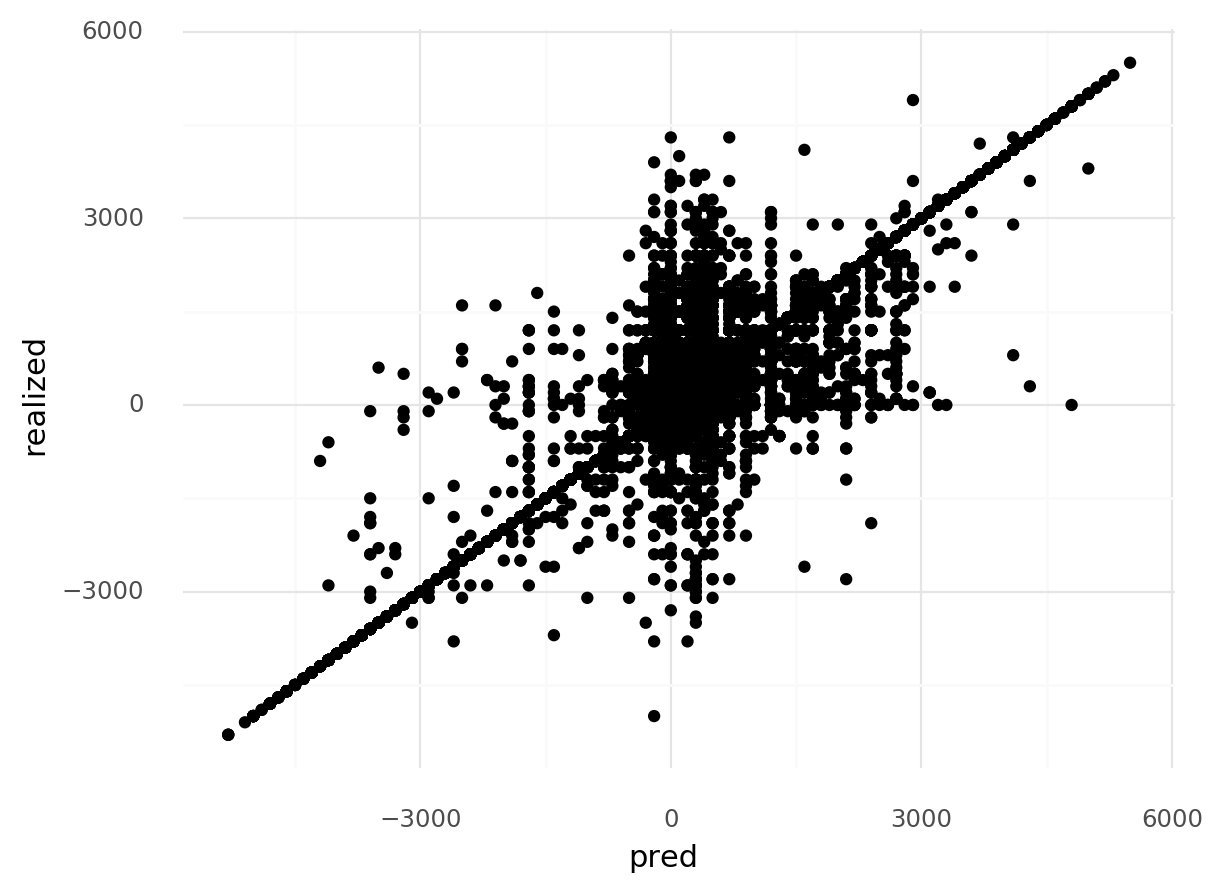

<ggplot: (-9223363263035344573)>

In [66]:
ggplot(df_scatter , aes(x = 'pred', y = 'realized')) + geom_point() + theme_minimal()

In [67]:
df_scatter2 = score2df.predicted_vs_realized(y_pred2 , ppd_y2 , le2)

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 382'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 371 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: Matplot

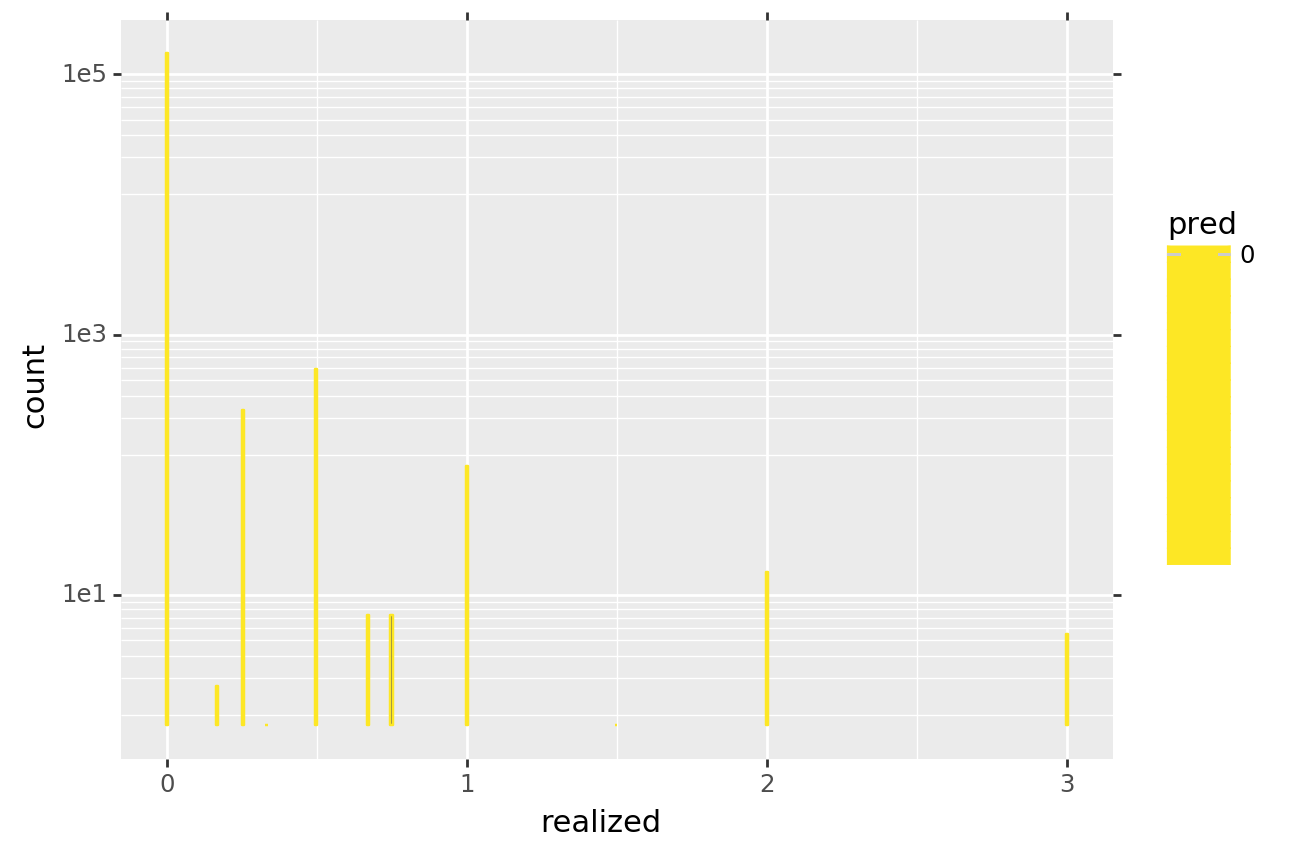

<ggplot: (8773803692790)>

In [68]:
ggplot(df_scatter2.query('pred == 0.0') , aes(x = 'realized' , color = "pred")) + geom_histogram() + scale_y_log10()# + facet_wrap('~pred' , scales = 'free') + theme_minimal()

In [69]:
ggplot(df_scatter2 , aes(x = 'realized' , color = "pred")) + \
geom_histogram() + scale_y_log10(breaks = range(10)) \
+ facet_wrap('~pred') \
+ coord_flip()\
+ scale_x_continuous(breaks = [i  for i in range(60)]) + theme_minimal()

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 743'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

In [ ]:
ggplot(df_scatter2.query('pred in [0,0.25,0.5,0.75,1]') , aes(x = 'realized' , color = "pred")) + \
geom_histogram() + scale_y_log10() \
+ facet_wrap('~pred') \
+ coord_flip()\
+ scale_x_continuous(breaks = [i / 5 for i in range(60)]) + theme_minimal()

In [ ]:
ggplot(df_scatter2 , aes(x = 'pred', y = 'realized')) + geom_point() + theme_minimal()

# generating music

device = torch.device("cpu")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [70]:
model.eval()

my_model(
  (relu): ReLU()
  (rnn): LSTM(169, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=108, bias=True)
  (linear2): Linear(in_features=512, out_features=61, bias=True)
  (linear1b): Linear(in_features=108, out_features=108, bias=True)
  (linear2b): Linear(in_features=61, out_features=61, bias=True)
)

In [71]:
x_gen = np.zeros(input_size1 + input_size2 , dtype = "float32")
x_gen[0] = 1.
x_gen[input_size1] = 1.

In [72]:
x_gen = x_gen.reshape([1,1,-1])
x_gen = torch.tensor(x_gen).to(device)

In [73]:
model = model.to(device)

In [74]:
N_gen = 200

In [75]:
for i in range(N_gen):    
    x1, x2 = model.forward(x_gen)
    x12 = torch.cat((x1 , x2) , dim = 2)
    x_gen = torch.cat([x_gen, x12[-1:]] , dim = 0)

In [76]:
x_gen.shape

torch.Size([201, 1, 169])

## alternative generation method(not working yet)

一番後ろだけアップデートするのでなく、まるごと（最初以外）置き換える手法も試してみる

In [ ]:
device = torch.device("cpu")

In [ ]:
x_gen = np.zeros(input_size , dtype = "float32")

In [ ]:
x_gen[0] = 1.

In [ ]:
x_gen = x_gen.reshape([1,1,-1])

In [ ]:
x_gen = torch.tensor(x_gen).to(device)

In [ ]:
model = model.to(device)

In [ ]:
N_gen = 200

In [ ]:
for i in range(N_gen):    
    x1 = model.forward(x_gen)
    x_gen = torch.cat([x_gen[:1] , x1] , dim = 0)

In [ ]:
x_gen.shape

## to score

In [77]:
nx_gen = x_gen.cpu().detach().numpy()

In [78]:
nx1_gen = nx_gen[:,:,range(input_size1)]

In [79]:
nx2_gen = nx_gen[:,:,range(input_size1,  input_size1 + input_size2)]

In [80]:
xidx1_gen = nx1_gen.argmax(axis = 2).reshape(-1)

In [81]:
xidx2_gen = nx2_gen.argmax(axis = 2).reshape(-1)

In [82]:
shift1_gen= np.array( [float(le1.classes_[xidx1_gen[i]]) for i in range(xidx1_gen.shape[0])])

In [83]:
shift2_gen= np.array( [float(le2.classes_[xidx2_gen[i]]) for i in range(xidx2_gen.shape[0])])

shift_cumsum_gen = shift_gen.cumsum()

In [84]:
from music21 import *

In [85]:
st1=stream.Stream()

In [86]:
#dt = 0.5
run_t = 0
base_note = note.Note("C5")
run_note = base_note

In [87]:
run_notes = []
#for i in range(15): #range(shift1_gen.shape[0]):
for i in range(shift1_gen.shape[0]):
    display(i)
    
    run_shift = int(shift1_gen[i] / 100)
    run_dt = shift2_gen[i]
    run_t = run_t + run_dt
    if i >= 57:
        pass #Pdb().set_trace()
    if run_dt != 0.:
        if i !=0: #len(run_notes) != 0:
            #display(",".join([x.nameWithOctave for x in run_notes]))
            st1.insert(run_t , chord.Chord(run_notes))
            display(run_notes)
            run_notes = []            
        if run_shift == 0:
            run_note = base_note
        else:                                      
            #run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
            run_note = interval.ChromaticInterval(run_shift).transposeNote(base_note)
        base_note = run_note
        #run_note = base_note
        run_notes = [run_note]
    else:
        if run_shift != 0.:            
            #run_note = run_note.transpose(interval.ChromaticInterval(run_shift))
            run_note = interval.ChromaticInterval(run_shift).transposeNote(run_note)
        run_notes.append(run_note)
        
    #   if run_dt != 0 or run_shift !=0:            
    #st1.insert(run_t , run_note)

0

1

2

[<music21.note.Note B>, <music21.note.Note G#>]

3

[<music21.note.Note E>]

4

[<music21.note.Note D>]

5

6

7

8

9

[<music21.note.Note C>,
 <music21.note.Note G>,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E>]

10

[<music21.note.Note C#>]

11

[<music21.note.Note D>]

12

[<music21.note.Note E->]

13

[<music21.note.Note E>]

14

[<music21.note.Note F>]

15

[<music21.note.Note F#>]

16

[<music21.note.Note G>]

17

[<music21.note.Note G#>]

18

19

[<music21.note.Note A>, <music21.note.Note B->]

20

21

[<music21.note.Note E>, <music21.note.Note B>]

22

[<music21.note.Note F>]

23

[<music21.note.Note F#>]

24

[<music21.note.Note G>]

25

[<music21.note.Note G#>]

26

[<music21.note.Note A>]

27

[<music21.note.Note B->]

28

[<music21.note.Note C>]

29

[<music21.note.Note D>]

30

[<music21.note.Note A>]

31

[<music21.note.Note E>]

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

[<music21.note.Note B>,
 <music21.note.Note C#>,
 <music21.note.Note E->,
 <music21.note.Note F>,
 <music21.note.Note G>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C#>,
 <music21.note.Note E->,
 <music21.note.Note F>,
 <music21.note.Note G>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note B->,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note D>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note B->,
 <music21.note.Note C>,
 <music21.note.Note C#>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note B>,
 <music21.note.Note F#>,
 <music21.note.Note C#>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note B->,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note C#>,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E>,
 <music21.note.Note F>

88

89

[<music21.note.Note F#>, <music21.note.Note G>]

90

[<music21.note.Note C#>]

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

[<music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E>,
 <music21.note.Note F>,
 <music21.note.Note F#>,
 <music21.note.Note G>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note B->,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note C#>,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E>,
 <music21.note.Note F>,
 <music21.note.Note F#>]

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

In [88]:
shift1_gen

array([ -100.,   900., -2000.,  -200.,  -200.,   700.,   700.,   100.,
         100.,   100.,   100.,   100.,   100.,   100.,   100.,   100.,
         100.,   100.,   100.,   700.,   700.,   100.,   100.,   100.,
         100.,   100.,   100.,   200.,   200.,   700.,   700.,   700.,
         200.,   200.,   200.,   200.,   200.,   200.,   200.,   200.,
         200.,   200.,   200.,   700.,   200.,   200.,   200.,   200.,
           0.,   200.,   200.,   200.,   200.,   200.,   200.,   100.,
         700.,   100.,   700.,   700.,   700.,   700.,   700.,   100.,
         100.,   100.,   100.,   100.,   100.,   100.,   100.,   100.,
         100.,   100.,   100.,   700.,   700.,   100.,   100.,   700.,
           0.,   700.,   100.,   700.,   700.,   700.,   100.,   700.,
         100.,   700.,   100.,   100.,   100.,   100.,   100.,   100.,
         100.,   100.,   100.,   100.,   100.,   100.,   100.,   100.,
         100.,   100.,   100.,   100.,   100.,     0.,     0.,     0.,
      

In [89]:
from IPython.display import Image

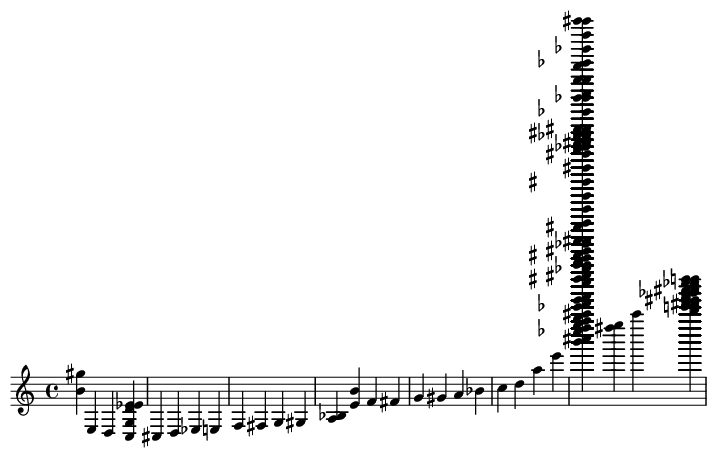

In [91]:
Image(filename=st1.write('lily.png'))

## to midi file

In [92]:
st1.write('midi', fp ='tmp/rnn_generated_1207.midi' )

'tmp/rnn_generated_1207.midi'

In [ ]:
import pygame
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)
pygame.mixer.music.set_volume(0.8)

In [ ]:
sp = midi.realtime.StreamPlayer(st1)
sp.play()

In [ ]:
st1.show('midi')

## sandbox

In [ ]:
st2 = stream.Stream()

In [ ]:
st2.insert(0 , chord.Chord([note.Note('C5') , note.Note('D5'), note.Note('F5') ,note.Note('F6'),note.Note('A7')]))

In [ ]:
st2.insert(0 , chord.Chord([note.Note('C5')])) 

In [ ]:
run_notes

In [ ]:
st2.insert(0 , chord.Chord(run_notes))

In [ ]:
Image(filename=st2.write('lily.png'))

# 比較用にlinear modelを用いてgenerate

In [ ]:
df_stage.columns

In [ ]:
sequence_gen = [800,200,0]

In [ ]:
N_gen = 100

noise_strength = 0.1 #1にするとmseの誤差項の大きさをそのまま使う

In [ ]:
for i in range(N_gen):
    df_gen = pd.DataFrame({'dcent_lag1':[sequence_gen[-1]] , 'dcent_lag2':[sequence_gen[-2]] , 'dcent_lag3':[sequence_gen[-3]]})
    sequence_gen.append(int(res.predict(df_gen + noise_strength * np.sqrt(res.mse_resid) * np.random.normal()) / 100) * 100)

In [ ]:
sequence_gen[0:20]

In [ ]:
shift_cumsum_gen = np.array(sequence_gen).cumsum() 

In [ ]:
st1=stream.Stream()

In [ ]:
dt = 0.5
base_note = note.Note("C5")

In [ ]:
for i in range(shift_cumsum_gen.shape[0]):
    run_shift = int(shift_cumsum_gen[i] / 100)
    run_dt = int()
    if run_shift == 0:
        run_note = base_note
    else:                                      
        run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
    st1.insert(0.5 * i , run_note)

In [ ]:
run_shift == 0

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename=st1.write('lily.png'))

## to midi file

In [ ]:
st1.write('midi', fp ='tmp/tmp.midi' )

## sandbox

In [ ]:
tmp = note.Note("D5")

In [ ]:
tmp.transpose(interval.GenericInterval(1))

In [ ]:
y_tmp = model.forward(ppd_X[0][:, 0:10].to(device))

In [ ]:
,rex0 = np.zeros(input_size , dtype = "float32")

In [ ]:
x0[0] = 1.

In [ ]:
x0 = x0.reshape([1,1,-1])

In [ ]:
x0 = torch.tensor(x0).to(device)

In [ ]:
model = model.to(device)

In [ ]:
x1 = model.forward(x0)

In [ ]:
x1.shape

In [ ]:
x = torch.cat([x0, x1] , dim = 0)

In [ ]:
x2 = model.forward(x)

In [ ]:
x2.shape

In [ ]:
x2[-2:-1].shape

In [ ]:
x = torch.cat([x, x2[-2:-1]] , dim = 0)

# my own try and error　（この節のプロセスは必要ない）

# Before starting the note...
Useful tips for jupyter notebook:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [ ]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
#environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [ ]:
us = environment.UserSettings() #不必要

#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'

# install musescore in linux (apt-getでインストールするのがポイント）

For all those who will struggle with displaying scores from music21 within Jupyter Notebook on Linux (e.g. Ubuntu), follow these steps:
https://stackoverflow.com/questions/49939275/python-music21-library-create-png-from-stream/49945456#49945456

MuseScoreのバージョンが2から3にあがっていたので、初期設定のままではうごきませんでした。
https://qiita.com/nofrmm/items/c3662555b145f6b42d92

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore'

In [ ]:
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
#environment.set("musicxmlPath", "/snap/bin/musescore")

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore.mscore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore.mscore'

In [ ]:
%load_ext music21.ipython21　#不必要